# Capstone Project 2 Data EDA

## Problem Statement:
COVID-19 pandemic has heavily impacted the United States from March 2020. Up to date, the total cases has accumulated to 28 million and deaths ~ 0.5 million with fatality rate ~1.8% nationly. In this study we are going to work on how did COVID-19 impact state by state over time, how did COVID-19 impact two gender groups, and how did COVID-19 impact age groups. Potentially we will look into how government policy influences covid-19 cases/deaths. This work will take about 1 month time. And the results could give guidance to people and/or the state government in future. 
 


## Data Sources:
CDC webpage provides certain dataset. The dataset for this study is United States COVID-19 Cases and Deaths by State over Time.
The downloading link is https://covid.cdc.gov/covid-data-tracker/#datatracker-home
Potential other data needed: 
1. Population in US states (US census, or state webpage)
2. COVID-19 government policy in US states (state webpage)


### import modules and import data

In [33]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# import data
df = pd.read_csv('covid-19_wrangling.csv')

### Explore the data

In [35]:
df.head()

,Unnamed: 0,index,submission_date,state,tot_cases,tot_death,created_at,tot_death_rate,daily_cases,daily_death
0,0,16022,2020-03-06,NE,1,0,03/26/2020 04:22:39 PM,0.0,1,0
1,1,1412,2020-03-07,NE,2,0,03/26/2020 04:22:39 PM,0.0,1,0
2,2,4317,2020-03-08,NE,2,0,03/26/2020 04:22:39 PM,0.0,0,0
3,3,3776,2020-03-09,NE,4,0,03/26/2020 04:22:39 PM,0.0,2,0
4,4,22787,2020-03-10,NE,4,0,03/26/2020 04:22:39 PM,0.0,0,0


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20182.0,175.816817,103.497726,0.0,86.000000,175.000000,265.000000,3.970000e+02
index,20182.0,11947.225102,6884.081502,0.0,5978.250000,11931.500000,17901.750000,2.387900e+04
tot_cases,20182.0,150842.906253,294340.152634,1.0,5719.250000,45389.500000,172556.000000,3.446611e+06
tot_death,20182.0,3412.958181,5687.205363,0.0,123.000000,987.000000,4196.250000,4.933800e+04
tot_death_rate,20182.0,0.026847,0.021377,0.0,0.013528,0.019944,0.035584,3.333333e-01
daily_cases,20182.0,1387.053018,3051.485582,-33355.0,64.000000,434.500000,1387.000000,7.173400e+04
daily_death,20182.0,24.724656,71.709307,-1824.0,0.000000,6.000000,24.000000,4.585000e+03


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20182 entries, 0 to 20181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20182 non-null  int64  
 1   index            20182 non-null  int64  
 2   submission_date  20182 non-null  object 
 3   state            20182 non-null  object 
 4   tot_cases        20182 non-null  int64  
 5   tot_death        20182 non-null  int64  
 6   created_at       20182 non-null  object 
 7   tot_death_rate   20182 non-null  float64
 8   daily_cases      20182 non-null  int64  
 9   daily_death      20182 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.5+ MB


In [38]:
states_all = df.state.unique()
print(states_all)

['NE' 'MS' 'IL' 'OR' 'WA' 'WY' 'NH' 'SD' 'SC' 'GA' 'IA' 'NJ' 'AR' 'AL'
 'OH' 'OK' 'DC' 'GU' 'MD' 'ID' 'IN' 'KS' 'RI' 'DE' 'MA' 'FSM' 'AZ' 'MT'
 'UT' 'ME' 'NY' 'PR' 'TN' 'CO' 'MN' 'VI' 'WI' 'RMI' 'KY' 'NC' 'NM' 'NYC'
 'VT' 'PA' 'NV' 'AS' 'WV' 'CA' 'MI' 'LA' 'VA' 'CT' 'TX' 'HI' 'MO' 'AK'
 'ND' 'FL' 'MP']


In [39]:
# drop 'created_at' column
df.drop(columns=['created_at'], inplace=True)

In [40]:
df.head()

,Unnamed: 0,index,submission_date,state,tot_cases,tot_death,tot_death_rate,daily_cases,daily_death
0,0,16022,2020-03-06,NE,1,0,0.0,1,0
1,1,1412,2020-03-07,NE,2,0,0.0,1,0
2,2,4317,2020-03-08,NE,2,0,0.0,0,0
3,3,3776,2020-03-09,NE,4,0,0.0,2,0
4,4,22787,2020-03-10,NE,4,0,0.0,0,0


### Current submission time is daily based. This part is to convert df to weekly based.

In [41]:
df.shape

(20182, 9)

In [42]:
#states=['TX', 'FL']
df_week = pd.DataFrame()

for stat in states_all:
    temp = df[df.state == stat]
    temp.drop(columns=['Unnamed: 0', 'tot_death_rate', 'daily_cases', 'daily_death'], inplace=True)
    temp = temp.set_index(pd.DatetimeIndex(temp['submission_date']))
    temp_week = temp.resample('W', label='left', loffset=pd.DateOffset(days=7)).max()
    temp_week['state'] = stat
    #temp_week.reset_index(inplace=True)
    df_week = df_week.append(temp_week)
    


C:\Users\prue1\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-42-a845d7cf1417>:8: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp_week = temp.resample('W', label='left', loffset=pd.DateOffset(days=7)).max()


In [43]:
df_week.tail()

,index,submission_date,state,tot_cases,tot_death
submission_date,,,,,
2021-01-31,22913,2021-01-31,MP,132,2
2021-02-07,14593,2021-02-07,MP,133,2
2021-02-14,23234,2021-02-14,MP,134,2
2021-02-21,23000,2021-02-21,MP,143,2
2021-02-28,17132,2021-02-22,MP,143,2


## load population data

In [44]:
pop = pd.read_csv('2020_census_csv.csv')

In [45]:
pop.head()

,State or territory,state,2020_population
0,California,CA,39368078.0
1,Texas,TX,29360759.0
2,Florida,FL,21733312.0
3,New York,NY,19336776.0
4,Pennsylvania,PA,12783254.0


In [46]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State or territory  50 non-null     object 
 1   state               50 non-null     object 
 2   2020_population     50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


### Merge two dataframes of COVID dataset and 2020 population data (from wikipedia)

In [47]:
#pop.state

In [48]:
states=['TX', 'FL']
df_merge = pd.DataFrame()

for stat in states_all:
    temp = df_week[df_week.state == stat] 
    if stat in list(pop.state):
        popu = pop[pop.state==stat]['2020_population'].values[0]
    else:
        popu=0
    temp['population'] = popu 
    df_merge = df_merge.append(temp)

<ipython-input-48-dfe5c4c54b07>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['population'] = popu


In [49]:
df_merge[df_merge.state == 'CA'].head()

,index,submission_date,state,tot_cases,tot_death,population
submission_date,,,,,,
2020-01-26,7694,2020-01-26,CA,2,0,39368078.0
2020-02-02,23694,2020-02-02,CA,3,0,39368078.0
2020-02-09,23724,2020-02-09,CA,6,0,39368078.0
2020-02-16,17664,2020-02-16,CA,8,0,39368078.0
2020-02-23,22246,2020-02-23,CA,10,0,39368078.0


In [50]:
# Drop states without population data
df_merge = df_merge[df_merge.population != 0]

In [51]:
print ("The states used for EDA will be:", len(df_merge.state.unique()), "states")
print("They are:", df_merge.state.unique())

The states used for EDA will be: 50 states
They are: ['NE' 'MS' 'IL' 'OR' 'WA' 'WY' 'NH' 'SD' 'SC' 'GA' 'IA' 'NJ' 'AR' 'AL'
 'OH' 'OK' 'MD' 'ID' 'IN' 'KS' 'RI' 'DE' 'MA' 'AZ' 'MT' 'UT' 'ME' 'NY'
 'TN' 'CO' 'MN' 'WI' 'KY' 'NC' 'NM' 'VT' 'PA' 'NV' 'WV' 'CA' 'MI' 'LA'
 'VA' 'CT' 'TX' 'HI' 'MO' 'AK' 'ND' 'FL']


In [52]:
df_merge.head()

,index,submission_date,state,tot_cases,tot_death,population
submission_date,,,,,,
2020-03-08,16022,2020-03-08,NE,2,0,1937552.0
2020-03-15,22787,2020-03-15,NE,18,0,1937552.0
2020-03-22,22088,2020-03-22,NE,50,0,1937552.0
2020-03-29,22692,2020-03-29,NE,120,2,1937552.0
2020-04-05,17788,2020-04-05,NE,367,8,1937552.0


## Weekly cases, weekly death, weekly death rate, and total death rate

In [53]:
df_merge['tot_death_rate'] = df_merge.tot_death / df_merge.tot_cases       

In [54]:
df_merge.head()

,index,submission_date,state,tot_cases,tot_death,population,tot_death_rate
submission_date,,,,,,,
2020-03-08,16022,2020-03-08,NE,2,0,1937552.0,0.000000
2020-03-15,22787,2020-03-15,NE,18,0,1937552.0,0.000000
2020-03-22,22088,2020-03-22,NE,50,0,1937552.0,0.000000
2020-03-29,22692,2020-03-29,NE,120,2,1937552.0,0.016667
2020-04-05,17788,2020-04-05,NE,367,8,1937552.0,0.021798


In [55]:
df.isnull().sum()

Unnamed: 0         0
index              0
submission_date    0
state              0
tot_cases          0
tot_death          0
tot_death_rate     0
daily_cases        0
daily_death        0
dtype: int64

### something is wrong with somedata in the dataframe which gives trouble to calculate the weekly cases, weekly death. A walked-around solution is to separated the dataframe into two and merge the dataframe later on.

In [71]:
df_merge1 = pd.DataFrame()

#states=['MD', 'ID', 'IN', 'KS', 'RI', 'DE', 'MA', 'AZ', 'MT', 'UT', 'ME', 'NY', 'TN', 'CO', 'MN', 'WI', 'KY', 'NC', 'NM', 'VT', 'PA', 'NV', 'WV', 'CA', 'MI', 'LA',
# 'VA', 'CT', 'TX', 'HI', 'MO', 'AK', 'ND', 'FL']

states=['NE', 'MS', 'IL', 'OR', 'WA', 'WY', 'NH', 'SD', 'SC', 'GA', 'IA', 'NJ', 'AR', 'AL', 'OH', 'OK']

for st in states: #_all:
    weekly_cases=[]
    weekly_death=[]
    
    temp = df_merge[df_merge.state == st]

    #print (temp.iloc[1, :])
    
    weekly_cases.append(temp.iloc[0][3])
    weekly_death.append(temp.iloc[0][4])
    
    for i in range(1, len(temp.tot_cases)):
        weekly_cases.append(temp.tot_cases[i]-temp.tot_cases[i-1]) 
        weekly_death.append(temp.tot_death[i]-temp.tot_death[i-1])
    temp['weekly_cases'] = weekly_cases
    temp['weekly_death'] = weekly_death
    df_merge1 = df_merge1.append(temp)
    
df_merge1.to_csv('part1.csv')

<ipython-input-71-22879d6b6044>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['weekly_cases'] = weekly_cases
<ipython-input-71-22879d6b6044>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['weekly_death'] = weekly_death


In [72]:
df_merge1 = pd.DataFrame()

states=['MD', 'ID', 'IN', 'KS', 'RI', 'DE', 'MA', 'AZ', 'MT', 'UT', 'ME', 'NY', 'TN', 'CO', 'MN', 'WI', 'KY', 'NC', 'NM', 'VT', 'PA', 'NV', 'WV', 'CA', 'MI', 'LA',
 'VA', 'CT', 'TX', 'HI', 'MO', 'AK', 'ND', 'FL']

#states=['NE', 'MS', 'IL', 'OR', 'WA', 'WY', 'NH', 'SD', 'SC', 'GA', 'IA', 'NJ', 'AR', 'AL', 'OH', 'OK']

for st in states: #_all:
    weekly_cases=[]
    weekly_death=[]
    
    temp = df_merge[df_merge.state == st]

    #print (temp.iloc[1, :])
    
    weekly_cases.append(temp.iloc[0][3])
    weekly_death.append(temp.iloc[0][4])
    
    for i in range(1, len(temp.tot_cases)):
        weekly_cases.append(temp.tot_cases[i]-temp.tot_cases[i-1]) 
        weekly_death.append(temp.tot_death[i]-temp.tot_death[i-1])
    temp['weekly_cases'] = weekly_cases
    temp['weekly_death'] = weekly_death
    df_merge1 = df_merge1.append(temp)
    
df_merge1.to_csv('part2.csv')

<ipython-input-72-03be7baf6d3f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['weekly_cases'] = weekly_cases
<ipython-input-72-03be7baf6d3f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['weekly_death'] = weekly_death


In [73]:
df1 = pd.read_csv('part1.csv')
df2 = pd.read_csv('part2.csv')

In [74]:
df1.head()

,submission_date,index,submission_date.1,state,tot_cases,tot_death,population,tot_death_rate,weekly_cases,weekly_death
0,2020-03-08,16022,2020-03-08,NE,2,0,1937552.0,0.000000,2,0
1,2020-03-15,22787,2020-03-15,NE,18,0,1937552.0,0.000000,16,0
2,2020-03-22,22088,2020-03-22,NE,50,0,1937552.0,0.000000,32,0
3,2020-03-29,22692,2020-03-29,NE,120,2,1937552.0,0.016667,70,2
4,2020-04-05,17788,2020-04-05,NE,367,8,1937552.0,0.021798,247,6


In [75]:
df2.head()

,submission_date,index,submission_date.1,state,tot_cases,tot_death,population,tot_death_rate,weekly_cases,weekly_death
0,2020-03-08,18885,2020-03-08,MD,3,0,6055802.0,0.000000,3,0
1,2020-03-15,20790,2020-03-15,MD,37,0,6055802.0,0.000000,34,0
2,2020-03-22,20392,2020-03-22,MD,288,3,6055802.0,0.010417,251,3
3,2020-03-29,22127,2020-03-29,MD,1239,10,6055802.0,0.008071,951,7
4,2020-04-05,23064,2020-04-05,MD,4045,91,6055802.0,0.022497,2806,81


In [78]:
df_merge = df1.append(df2)

In [87]:
df_merge.state.unique()

array(['NE', 'MS', 'IL', 'OR', 'WA', 'WY', 'NH', 'SD', 'SC', 'GA', 'IA',
       'NJ', 'AR', 'AL', 'OH', 'OK', 'MD', 'ID', 'IN', 'KS', 'RI', 'DE',
       'MA', 'AZ', 'MT', 'UT', 'ME', 'NY', 'TN', 'CO', 'MN', 'WI', 'KY',
       'NC', 'NM', 'VT', 'PA', 'NV', 'WV', 'CA', 'MI', 'LA', 'VA', 'CT',
       'TX', 'HI', 'MO', 'AK', 'ND', 'FL'], dtype=object)

In [92]:
df_merge.head()

,submission_date,index,submission_date.1,state,tot_cases,tot_death,population,tot_death_rate,weekly_cases,weekly_death
0,2020-03-08,16022,2020-03-08,NE,2,0,1937552.0,0.000000,2,0
1,2020-03-15,22787,2020-03-15,NE,18,0,1937552.0,0.000000,16,0
2,2020-03-22,22088,2020-03-22,NE,50,0,1937552.0,0.000000,32,0
3,2020-03-29,22692,2020-03-29,NE,120,2,1937552.0,0.016667,70,2
4,2020-04-05,17788,2020-04-05,NE,367,8,1937552.0,0.021798,247,6


### plot all the states tot_cases  and tot_death, and decide which states to do deeper study

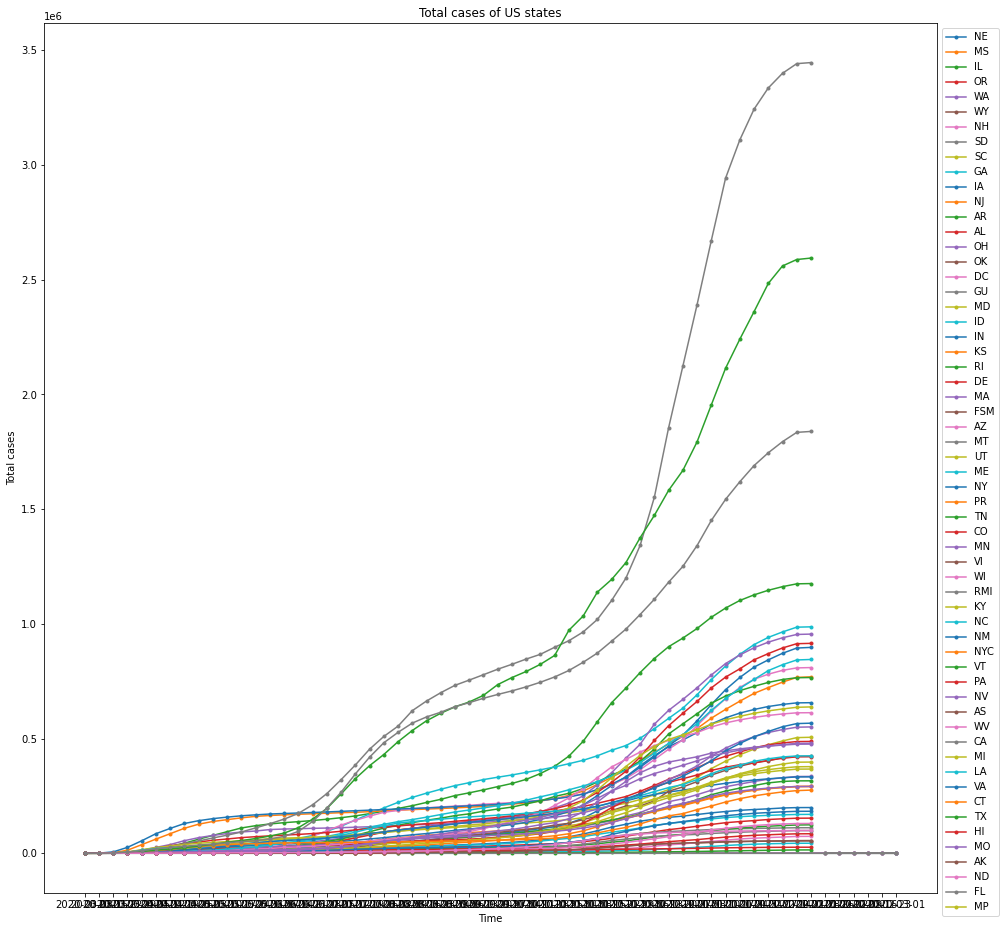

In [97]:
plt.figure(figsize=(16, 16))

for stat in states_all:
    temp = df_merge[df_merge.state == stat]   #.iloc[-20:, :]
    plt.plot(temp.submission_date, (temp.tot_cases), marker='.', label=stat)
#plt.ylim(0, 1000000)
#plt.xlim('2020-06-01', '2020-03-01')
plt.xlabel('Time')
plt.ylabel('Total cases')
plt.title('Total cases of US states')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()    

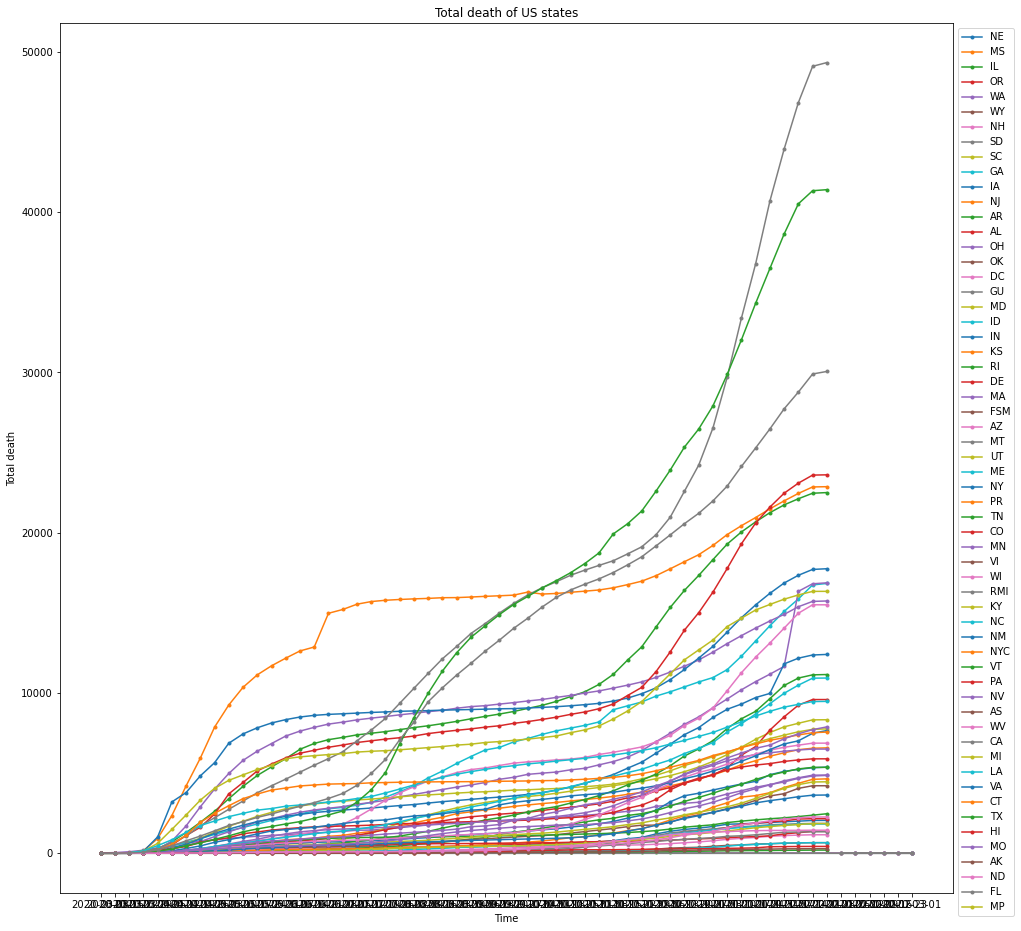

In [99]:
plt.figure(figsize=(16, 16))

for stat in states_all:
    temp = df_merge[df_merge.state == stat]   #.iloc[-20:, :]
    plt.plot(temp.submission_date, (temp.tot_death), marker='.', label=stat)
#plt.ylim(0, 1000000)
#plt.xlim('2020-06-01', '2020-03-01')
plt.xlabel('Time')
plt.ylabel('Total death')
plt.title('Total death of US states')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 

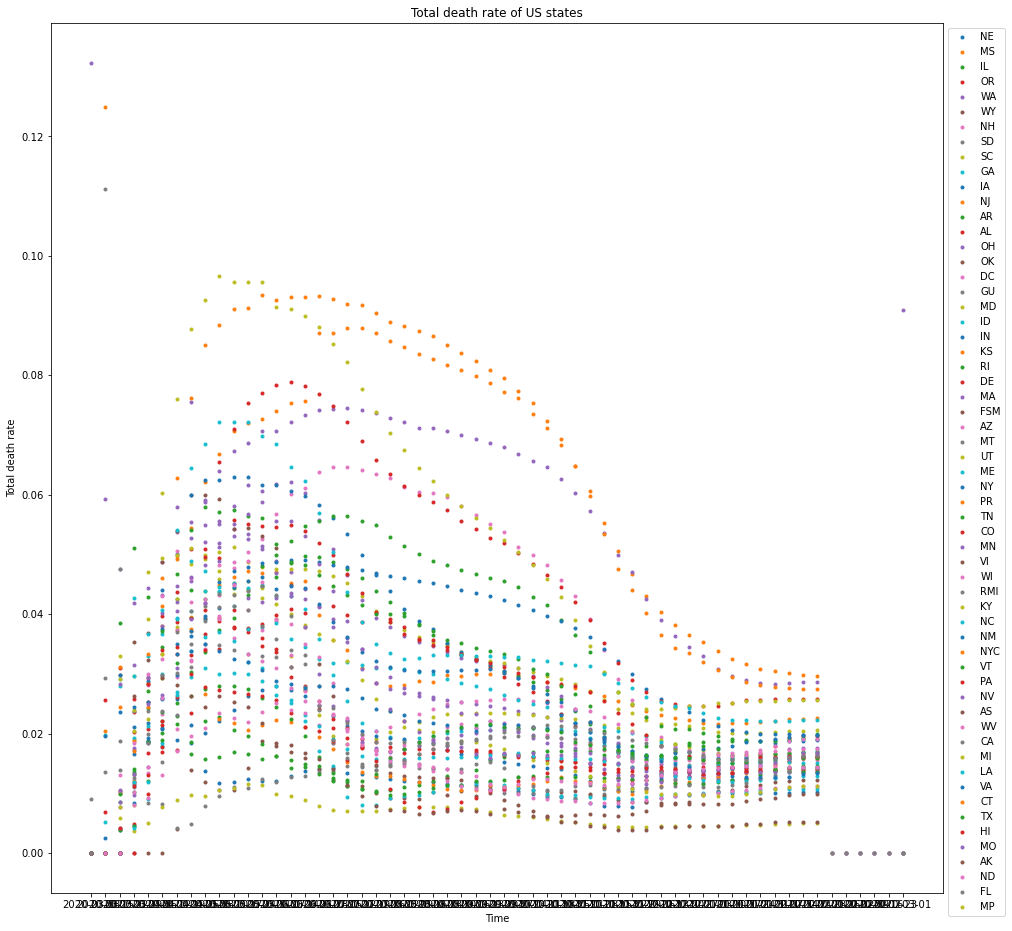

In [105]:
plt.figure(figsize=(16, 16))

for stat in states_all:
    temp = df_merge[df_merge.state == stat]   #.iloc[-20:, :]
    plt.scatter(temp.submission_date, (temp.tot_death_rate), marker='.', label=stat)
#plt.ylim(0, 1000000)
#plt.xlim('2020-06-01', '2020-03-01')
plt.xlabel('Time')
plt.ylabel('Total death rate')
plt.title('Total death rate of US states')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 

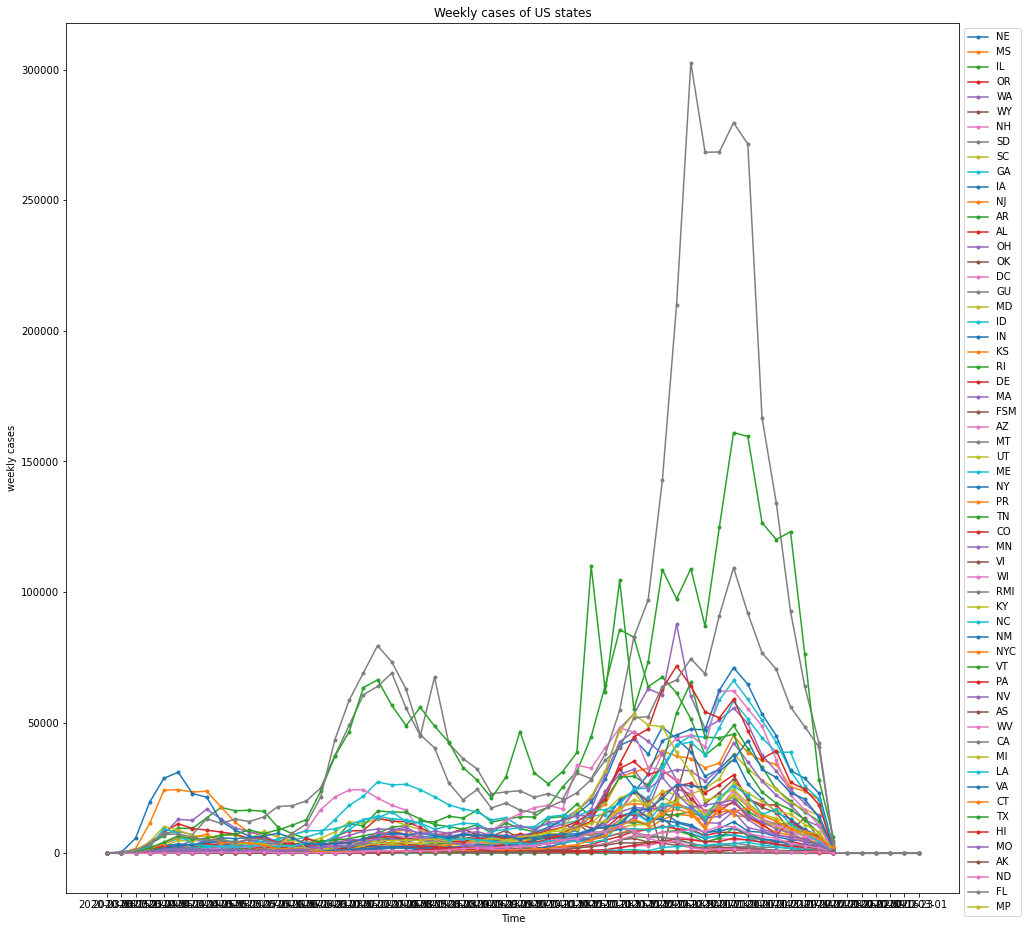

In [101]:
plt.figure(figsize=(16, 16))

for stat in states_all:
    temp = df_merge[df_merge.state == stat]   #.iloc[-20:, :]
    plt.plot(temp.submission_date, (temp.weekly_cases), marker='.', label=stat)
#plt.ylim(0, 1000000)
#plt.xlim('2020-06-01', '2020-03-01')
plt.xlabel('Time')
plt.ylabel('weekly cases')
plt.title('Weekly cases of US states')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 

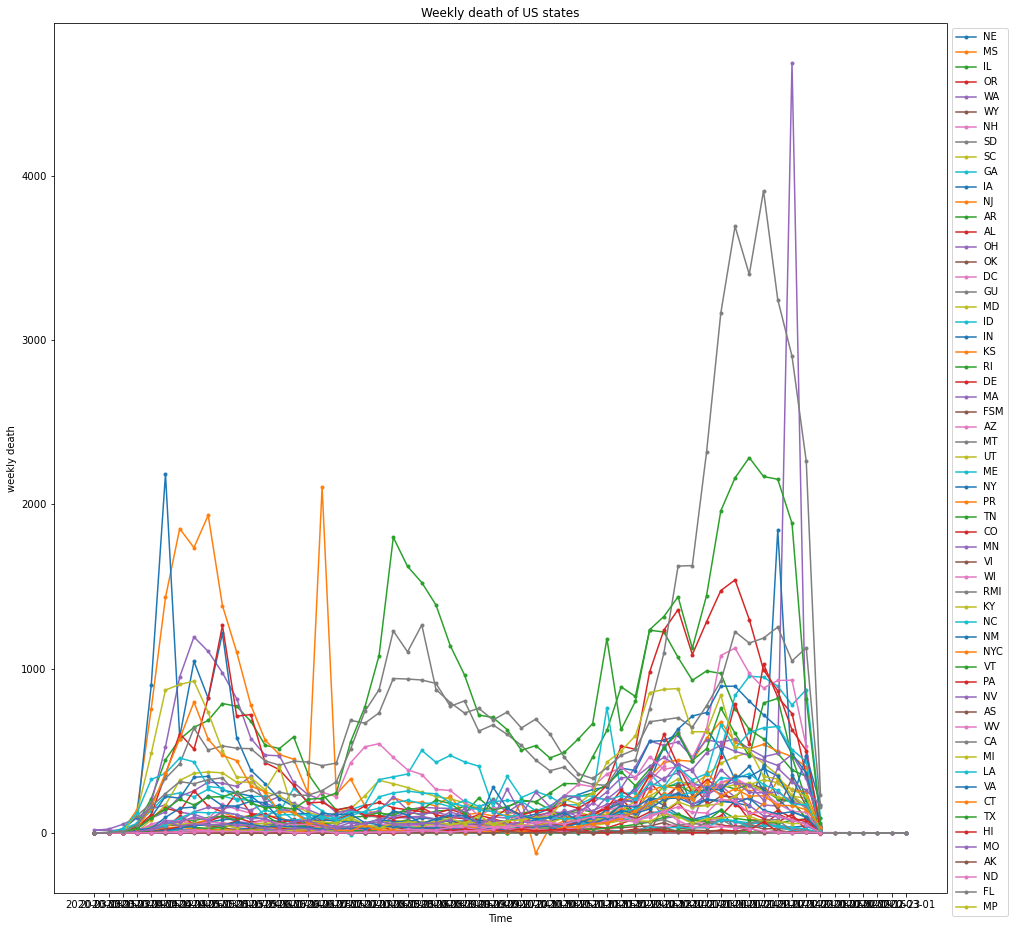

In [104]:
plt.figure(figsize=(16, 16))

for stat in states_all:
    temp = df_merge[df_merge.state == stat]   #.iloc[-20:, :]
    plt.plot(temp.submission_date, (temp.weekly_death), marker='.', label=stat)
#plt.ylim(0, 1000000)
#plt.xlim('2020-06-01', '2020-03-01')
plt.xlabel('Time')
plt.ylabel('weekly death')
plt.title('Weekly death of US states')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 